# Data Understanding

## Data Information

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [542]:
df = pd.read_csv('transaction_data-2.csv')
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


## Missing Values

In [544]:
# Check for missing values and specific unwanted values
missing_values = df.isnull().sum()
custom_missing = df.isin([-1, 0, '0', '-']).sum()

# Combine results
total_missing = missing_values + custom_missing

total_missing

UserId                    270160
TransactionId                  0
TransactionTime                0
ItemCode                    5592
ItemDescription             2908
NumberOfItemsPurchased         0
CostPerItem                 5030
Country                        0
dtype: int64

## Duplicates

In [545]:
# Check for duplicates
df.duplicated().sum()

547246

In [546]:
# Check for duplicates
df[df.duplicated()]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
1675,-1,5963199,Sun Apr 08 09:44:00 IST 2018,452676,CERAMIC STRAWBERRY MONEY BOX,9,5.70,United Kingdom
1680,308196,6244777,Tue Dec 04 05:52:00 IST 2018,479157,CARD SUKI BIRTHDAY,108,0.58,United Kingdom
2654,269934,6048284,Sun Jun 24 10:17:00 IST 2018,1787583,WHITE HANGING HEART T-LIGHT HOLDER,9,4.08,United Kingdom
3165,328461,5999565,Mon May 14 09:03:00 IST 2018,482202,JAM JAR WITH PINK LID,36,1.18,United Kingdom
3369,-1,6217541,Wed Nov 14 05:26:00 IST 2018,477267,ALARM CLOCK BAKELIKE RED,3,10.30,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


## Boxplot

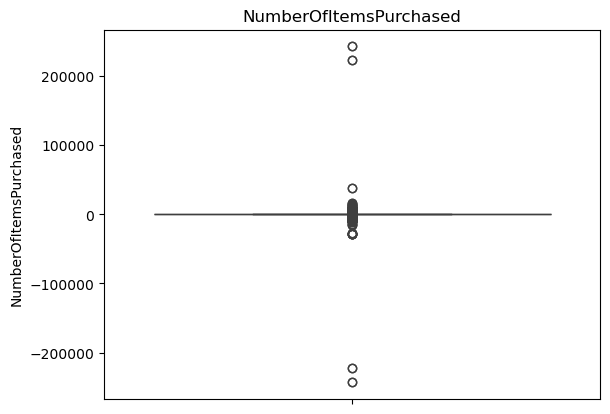

In [547]:
# Boxplot NumberofItemsPurchased

sns.boxplot(df['NumberOfItemsPurchased'])
plt.title('NumberOfItemsPurchased')

plt.show()

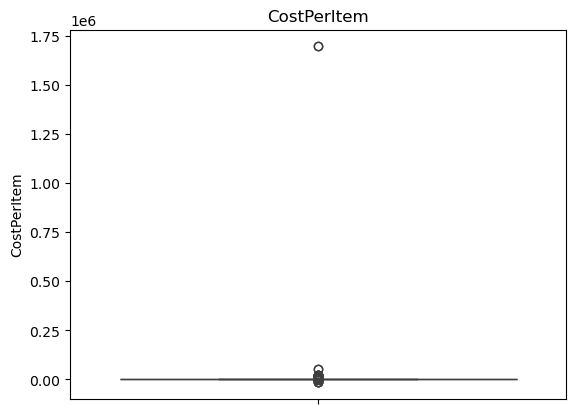

In [548]:
# Boxplot CostPerItem

sns.boxplot(df['CostPerItem'])
plt.title('CostPerItem')

plt.show()

## Outliers

In [549]:
# Check for outliers
numerik = df.select_dtypes(include = 'number') # float dan int
df.select_dtypes(include = 'number')
numerik.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


In [550]:
# Outlier for NumberOfItemsPurchased
df.select_dtypes(include = 'number')
q3 = numerik.describe().loc['75%','NumberOfItemsPurchased']
q1 = numerik.describe().loc['25%','NumberOfItemsPurchased']
iqr = q3 - q1
whis = 1.5 * iqr
batas_atas = q3 + whis
batas_bawah = q1 - whis

# jumlah outliers
jumlah_outliers = len(df[(df['NumberOfItemsPurchased']>batas_atas) | (df['NumberOfItemsPurchased']<batas_bawah)])
jumlah_outliers


117238

In [551]:
# Outlier for CostPerItem
df.select_dtypes(include = 'number')
q3 = numerik.describe().loc['75%','CostPerItem']
q1 = numerik.describe().loc['25%','CostPerItem']
iqr = q3 - q1
whis = 1.5 * iqr
batas_atas = q3 + whis
batas_bawah = q1 - whis

# jumlah outliers
jumlah_outliers = len(df[(df['CostPerItem']>batas_atas) | (df['CostPerItem']<batas_bawah)])
jumlah_outliers

79254

## Distribution Data

In [552]:
# Kolmogorov-Smirnov Test

from scipy.stats import kstest
df_copy = df.select_dtypes(include = 'number')
for kolom in numerik.columns:
    stat, pval = kstest(df_copy[kolom], 'norm')
    if pval < 0.05:
        print(f'Distribusi tidak normal {kolom} (Tolak H0)')
    else:
        print(f'Distribusi normal {kolom} (Terima H0)')

Distribusi tidak normal UserId (Tolak H0)
Distribusi tidak normal TransactionId (Tolak H0)
Distribusi tidak normal ItemCode (Tolak H0)
Distribusi tidak normal NumberOfItemsPurchased (Tolak H0)
Distribusi tidak normal CostPerItem (Tolak H0)


In [553]:
# Lilliefors Test
from statsmodels.stats.diagnostic import lilliefors

for kolom in numerik.columns:
    stat, pval = lilliefors(df_copy[kolom])
    if pval < 0.05:
        print(f'Distribusi tidak normal {kolom} (Tolak H0)')
    else:
        print(f'Distribusi normal {kolom} (Terima H0)')

Distribusi tidak normal UserId (Tolak H0)
Distribusi tidak normal TransactionId (Tolak H0)
Distribusi tidak normal ItemCode (Tolak H0)
Distribusi tidak normal NumberOfItemsPurchased (Tolak H0)
Distribusi tidak normal CostPerItem (Tolak H0)


In [554]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

for kolom in numerik.columns:
    stat, pval = shapiro(df_copy[kolom])
    if pval < 0.05:
        print(f'Distribusi tidak normal {kolom} (Tolak H0)')
    else:
        print(f'Distribusi normal {kolom} (Terima H0)')

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1083818.



Distribusi tidak normal UserId (Tolak H0)
Distribusi tidak normal TransactionId (Tolak H0)
Distribusi tidak normal ItemCode (Tolak H0)
Distribusi tidak normal NumberOfItemsPurchased (Tolak H0)
Distribusi tidak normal CostPerItem (Tolak H0)


In [555]:
# D'Agostino Test
from scipy.stats import normaltest

for kolom in numerik.columns:
    stat, pval = normaltest(df_copy[kolom])
    if pval < 0.05:
        print(f'Distribusi tidak normal {kolom} (Tolak H0)')
    else:
        print(f'Distribusi normal {kolom} (Terima H0)')

Distribusi tidak normal UserId (Tolak H0)
Distribusi tidak normal TransactionId (Tolak H0)
Distribusi tidak normal ItemCode (Tolak H0)
Distribusi tidak normal NumberOfItemsPurchased (Tolak H0)
Distribusi tidak normal CostPerItem (Tolak H0)


## Correlation

### Numeric

In [556]:
# Correlation of Numeric Data
df.select_dtypes(include = 'number').corr()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
UserId,1.000000,0.080351,-0.051638,0.018702,-0.000746
TransactionId,0.080351,1.000000,-0.079268,0.000270,-0.002629
ItemCode,-0.051638,-0.079268,1.000000,0.000700,-0.001770
NumberOfItemsPurchased,0.018702,0.000270,0.000700,1.000000,-0.000081
CostPerItem,-0.000746,-0.002629,-0.001770,-0.000081,1.000000


### Pearson

<Axes: >

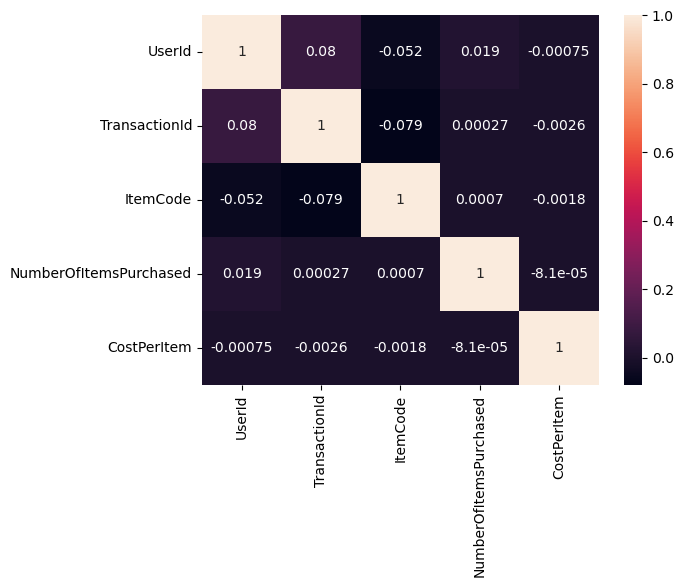

In [557]:
# Pearson Correlation
sns.heatmap(numerik.corr(method = 'pearson'), annot = True)

### Spearman

<Axes: >

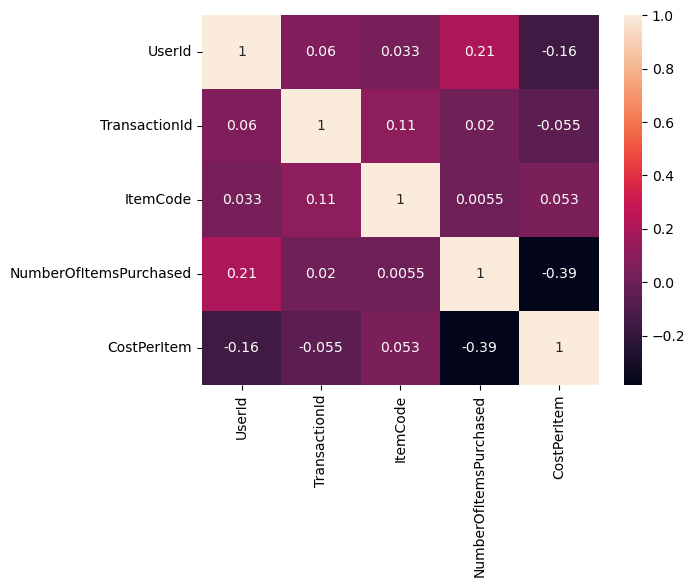

In [558]:
# Spearman Correlation
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

### Pairplot

## Summary of Data Understanding

- **Dataset** terdapat beberapa **outlier** yang terdeteksi pada kolom `NumberOfItemsPurchased` dan `CostPerItem`, yang perlu diselidiki lebih lanjut. Untuk mendeteksi outlier, metode **Interquartile Range (IQR)** digunakan. Berdasarkan perhitungan IQR, sejumlah nilai berada di luar batas yang ditentukan dan dianggap sebagai outlier. Jumlah outlier yang terdeteksi pada masing-masing kolom adalah sebagai berikut:
  
  - **NumberOfItemsPurchased**: 117238
  - **CostPerItem**: 79254

- **Missing Values**:  
  Kode memeriksa nilai yang hilang menggunakan metode `.isnull()` dan juga mengecek nilai-nilai yang tidak diinginkan seperti `-1`, `0`, `'0'`, dan `'-'`, yang sering kali menunjukkan data yang hilang atau tidak valid. Hasil dari pemeriksaan ini digabungkan untuk memberikan total nilai yang hilang atau tidak diinginkan di setiap kolom, yang memungkinkan untuk menentukan langkah-langkah perbaikan seperti imputasi atau penghapusan.

- **Distribution Data**:  
  Distribusi data pada kolom numerik sebagian besar tidak normal, menggunakan metode:
  
  1. **Kolmogorov-Smirnov**
  2. **Lilliefors**
  3. **Shapiro-Wilk**
  4. **D'Agostino**
  
  Hasil uji statistik menunjukkan bahwa sebagian besar kolom numerik tidak mengikuti distribusi normal.

- **Correlation**: Ada beberapa korelasi yang terdeteksi dalam data, dengan beberapa di antaranya lebih menonjol dan mungkin memerlukan **penyelidikan lebih terfokus**.

- Secara keseluruhan, dataset dapat **dibersihkan dan dipersiapkan** untuk proses analisis atau pemodelan lebih lanjut.

# Data Cleaning

## Duplicates Removal

In [559]:
# Duplicates Remove

df = df.drop_duplicates()
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1080730,-1,6345240,Mon Jan 28 11:23:00 IST 2019,487116,VINTAGE LEAF MAGNETIC NOTEPAD,3,4.55,United Kingdom
1081224,342636,6268328,Tue Dec 18 09:48:00 IST 2018,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom
1081271,374577,6277348,Sun Dec 23 10:34:00 IST 2018,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom
1081376,378861,5973099,Mon Apr 16 09:11:00 IST 2018,469707,CHILDRENS APRON SPACEBOY DESIGN,12,2.70,United Kingdom


In [560]:
# Check for duplicates
df.duplicated().sum()

0

## TransactionTime to datetime

In [561]:
# Change TransactionTime to datetime
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'])

df.dtypes

/var/folders/zg/jt45pl_s0klc5f0xrh5mk_j40000gn/T/ipykernel_5715/933612629.py:2: FutureWarning:

Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.

/var/folders/zg/jt45pl_s0klc5f0xrh5mk_j40000gn/T/ipykernel_5715/933612629.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



UserId                             int64
TransactionId                      int64
TransactionTime           datetime64[ns]
ItemCode                           int64
ItemDescription                   object
NumberOfItemsPurchased             int64
CostPerItem                      float64
Country                           object
dtype: object

## Variable Name Changing

In [562]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [563]:
# Change variable name
df = df.rename(columns={'UserId': 'CustomerID', 'TransactionId': 'InvoiceNo', 'TransactionTime': 'InvoiceDate', 'ItemCode': 'StockCode', 'ItemDescription': 'Description', 'NumberOfItemsPurchased': 'Quantity', 'CostPerItem': 'UnitPrice', 'Country': 'Country'})

df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


## Add TotalTransaction Column

In [564]:
# Add TotalTransaction Column
#df['TotalTransaction'] = df['Quantity'] * df['UnitPrice']

#df.head()

## Remove Missing Values

In [565]:
# Remove negative values
df = df[df['CustomerID'] != -1]

df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


In [566]:
df = df[df['StockCode'] != -1]

In [567]:
df = df[df['UnitPrice'] != -1.00]

In [568]:
df = df[df['UnitPrice'] != 0.00]

In [569]:
df = df[df['Quantity'] != 0]

In [570]:
df = df[df['Quantity'] != -3]

In [571]:
# Removing InovoiceDate up to 2024
df = df[df['InvoiceDate'].dt.year <= 2024]
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
1080031,324303,6204462,2018-11-03 08:52:00,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom
1080203,374661,5911455,2018-02-17 10:51:00,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom
1081224,342636,6268328,2018-12-18 09:48:00,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom
1081271,374577,6277348,2018-12-23 10:34:00,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom


In [572]:
# Check df
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
1080031,324303,6204462,2018-11-03 08:52:00,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom
1080203,374661,5911455,2018-02-17 10:51:00,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom
1081224,342636,6268328,2018-12-18 09:48:00,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom
1081271,374577,6277348,2018-12-23 10:34:00,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom


## Data Validation

In [573]:
# Data Validation
df.dtypes

CustomerID              int64
InvoiceNo               int64
InvoiceDate    datetime64[ns]
StockCode               int64
Description            object
Quantity                int64
UnitPrice             float64
Country                object
dtype: object

In [574]:
 # Check for missing values and specific unwanted values
missing_values = df.isnull().sum()
custom_missing = df.isin([-1, 0, '0', '-']).sum()

# Combine results
total_missing = missing_values + custom_missing

total_missing

CustomerID     0
InvoiceNo      0
InvoiceDate    0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

# Data Analysis

## Cohort Analysis

### Acqusition Date

In [575]:
# Extract month from InvoiceDate
df['InvoiceDate'].dt.month

0           2
1          12
2           2
3           6
5           1
           ..
1080031    11
1080203     2
1081224    12
1081271    12
1081376     4
Name: InvoiceDate, Length: 395127, dtype: int32

In [576]:
df['InvoiceDate'].dt.to_period('M')

0          2019-02
1          2018-12
2          2019-02
3          2018-06
5          2019-01
            ...   
1080031    2018-11
1080203    2018-02
1081224    2018-12
1081271    2018-12
1081376    2018-04
Name: InvoiceDate, Length: 395127, dtype: period[M]

In [577]:
df.groupby('CustomerID')['InvoiceDate'].min()

CustomerID
259266   2018-04-01 06:01:00
259287   2018-04-09 10:30:00
259308   2018-02-27 15:09:00
259329   2019-02-02 05:51:00
259350   2018-04-16 12:01:00
                 ...        
383880   2018-05-19 05:52:00
383901   2018-08-24 06:53:00
383922   2018-10-17 09:35:00
383943   2018-03-20 10:14:00
384027   2018-08-03 06:39:00
Name: InvoiceDate, Length: 4348, dtype: datetime64[ns]

In [578]:
df.groupby('CustomerID')['InvoiceDate'].transform('min')

0         2018-03-27 09:36:00
1         2018-02-19 07:16:00
2         2018-12-17 10:50:00
3         2018-02-16 08:13:00
5         2018-08-24 08:55:00
                  ...        
1080031   2018-04-06 09:25:00
1080203   2018-02-12 10:30:00
1081224   2018-02-27 10:26:00
1081271   2018-09-10 12:44:00
1081376   2018-02-13 07:21:00
Name: InvoiceDate, Length: 395127, dtype: datetime64[ns]

In [579]:
df['Acquisition Date']= df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Acquisition Date
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2018-03
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-02
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2018-12
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-02
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,2018-08
...,...,...,...,...,...,...,...,...,...
1080031,324303,6204462,2018-11-03 08:52:00,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom,2018-04
1080203,374661,5911455,2018-02-17 10:51:00,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom,2018-02
1081224,342636,6268328,2018-12-18 09:48:00,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom,2018-02
1081271,374577,6277348,2018-12-23 10:34:00,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom,2018-09


### Transaction Month

In [580]:
df['Transaction Month']= df['InvoiceDate'].dt.to_period('M')
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Acquisition Date,Transaction Month
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2018-03,2019-02
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-02,2018-12
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2018-12,2019-02
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-02,2018-06
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,2018-08,2019-01
...,...,...,...,...,...,...,...,...,...,...
1080031,324303,6204462,2018-11-03 08:52:00,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom,2018-04,2018-11
1080203,374661,5911455,2018-02-17 10:51:00,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom,2018-02,2018-02
1081224,342636,6268328,2018-12-18 09:48:00,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom,2018-02,2018-12
1081271,374577,6277348,2018-12-23 10:34:00,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom,2018-09,2018-12


### Total user acquisition date (New Users)

In [581]:
cohort_table = df.groupby(['Acquisition Date','Transaction Month'])['CustomerID'].nunique().reset_index()
cohort_table = cohort_table.rename(columns = {'CustomerID':'N_Users'})
cohort_table

,Acquisition Date,Transaction Month,N_Users
0,2018-02,2018-02,840
1,2018-02,2018-03,249
2,2018-02,2018-04,315
3,2018-02,2018-05,284
4,2018-02,2018-06,350
...,...,...,...
86,2018-12,2019-01,105
87,2018-12,2019-02,81
88,2019-01,2019-01,342
89,2019-01,2019-02,79


### Period Month

In [582]:
cohort_table['Period Month'] = cohort_table['Transaction Month'].dt.month - cohort_table['Acquisition Date'].dt.month
cohort_table

,Acquisition Date,Transaction Month,N_Users,Period Month
0,2018-02,2018-02,840,0
1,2018-02,2018-03,249,1
2,2018-02,2018-04,315,2
3,2018-02,2018-05,284,3
4,2018-02,2018-06,350,4
...,...,...,...,...
86,2018-12,2019-01,105,-11
87,2018-12,2019-02,81,-10
88,2019-01,2019-01,342,0
89,2019-01,2019-02,79,1


In [583]:
# Menghitung selisih bulan dengan memperhitungkan tahun
cohort_table['Period Month'] = (cohort_table['Transaction Month'].dt.year - cohort_table['Acquisition Date'].dt.year) * 12 + cohort_table['Transaction Month'].dt.month - cohort_table['Acquisition Date'].dt.month
cohort_table

,Acquisition Date,Transaction Month,N_Users,Period Month
0,2018-02,2018-02,840,0
1,2018-02,2018-03,249,1
2,2018-02,2018-04,315,2
3,2018-02,2018-05,284,3
4,2018-02,2018-06,350,4
...,...,...,...,...
86,2018-12,2019-01,105,1
87,2018-12,2019-02,81,2
88,2019-01,2019-01,342,0
89,2019-01,2019-02,79,1


### Pivot Table

In [584]:
cohort_pivot = cohort_table.pivot_table(index='Acquisition Date', columns='Period Month', values='N_Users')
cohort_pivot

Period Month,0,1,2,3,4,5,6,7,8,9,10,11,12
Acquisition Date,,,,,,,,,,,,,
2018-02,840.0,249.0,315.0,284.0,350.0,323.0,313.0,313.0,292.0,308.0,344.0,399.0,365.0
2018-03,275.0,84.0,75.0,84.0,95.0,91.0,81.0,82.0,82.0,99.0,105.0,85.0,NaN
2018-04,423.0,85.0,120.0,116.0,104.0,102.0,111.0,102.0,124.0,137.0,88.0,NaN,NaN
2018-05,439.0,89.0,106.0,115.0,101.0,81.0,94.0,125.0,130.0,103.0,NaN,NaN,NaN
2018-06,398.0,95.0,92.0,78.0,84.0,77.0,99.0,107.0,65.0,NaN,NaN,NaN,NaN
2018-07,276.0,62.0,49.0,57.0,43.0,78.0,75.0,68.0,NaN,NaN,NaN,NaN,NaN
2018-08,244.0,46.0,40.0,43.0,69.0,69.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-09,187.0,36.0,25.0,45.0,45.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10,192.0,42.0,39.0,48.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Precentage

In [585]:
cohort_pivot_per = cohort_pivot.apply(lambda x: x/x.iloc[0]*100, axis = 1)
cohort_pivot_per

Period Month,0,1,2,3,4,5,6,7,8,9,10,11,12
Acquisition Date,,,,,,,,,,,,,
2018-02,100.0,29.642857,37.500000,33.809524,41.666667,38.452381,37.261905,37.261905,34.761905,36.666667,40.952381,47.500000,43.452381
2018-03,100.0,30.545455,27.272727,30.545455,34.545455,33.090909,29.454545,29.818182,29.818182,36.000000,38.181818,30.909091,NaN
2018-04,100.0,20.094563,28.368794,27.423168,24.586288,24.113475,26.241135,24.113475,29.314421,32.387707,20.803783,NaN,NaN
2018-05,100.0,20.273349,24.145786,26.195900,23.006834,18.451025,21.412301,28.473804,29.612756,23.462415,NaN,NaN,NaN
2018-06,100.0,23.869347,23.115578,19.597990,21.105528,19.346734,24.874372,26.884422,16.331658,NaN,NaN,NaN,NaN
2018-07,100.0,22.463768,17.753623,20.652174,15.579710,28.260870,27.173913,24.637681,NaN,NaN,NaN,NaN,NaN
2018-08,100.0,18.852459,16.393443,17.622951,28.278689,28.278689,18.032787,NaN,NaN,NaN,NaN,NaN,NaN
2018-09,100.0,19.251337,13.368984,24.064171,24.064171,24.064171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10,100.0,21.875000,20.312500,25.000000,17.708333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### HeatMap

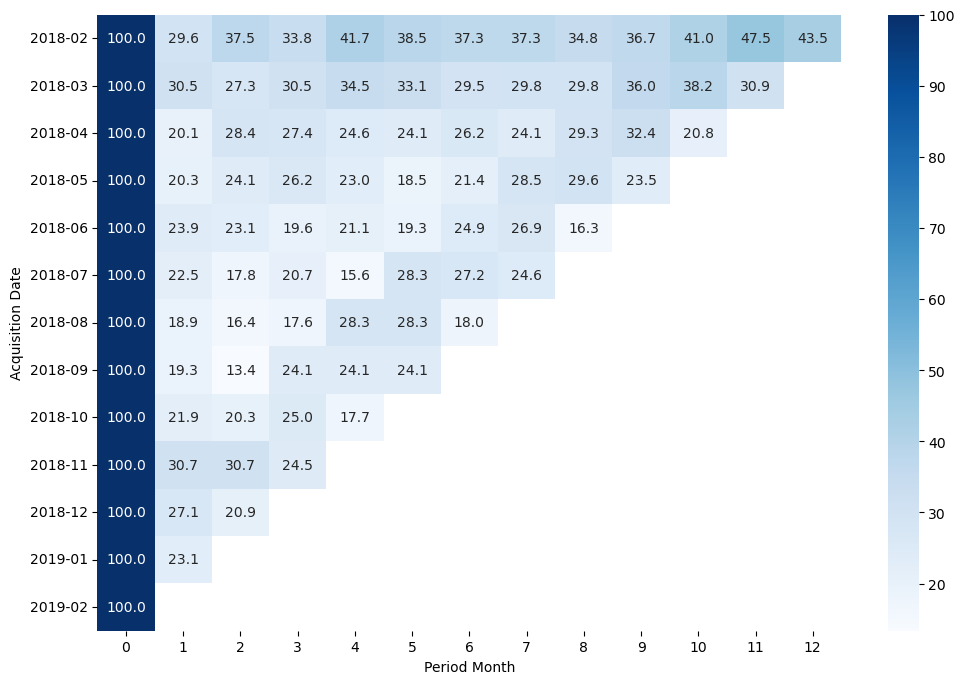

In [586]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

sns.heatmap(cohort_pivot_per, annot=True, cmap='Blues', fmt = '.1f')
plt.show()

## RFM Analysis

### Recency (R)

In [587]:
# mengambil data paling akhir (max) dari data
current_date = df['InvoiceDate'].max()
current_date

Timestamp('2019-02-20 08:50:00')

In [588]:
last_transaction = df.groupby('CustomerID')['InvoiceDate'].max()
last_transaction

CustomerID
259266   2018-04-01 06:17:00
259287   2019-02-18 11:52:00
259308   2018-12-07 09:13:00
259329   2019-02-02 05:51:00
259350   2018-04-16 12:01:00
                 ...        
383880   2018-05-19 05:52:00
383901   2018-08-24 06:53:00
383922   2019-02-13 07:43:00
383943   2019-02-17 08:02:00
384027   2019-01-09 05:29:00
Name: InvoiceDate, Length: 4348, dtype: datetime64[ns]

In [589]:
current_date - last_transaction

CustomerID
259266   325 days 02:33:00
259287     1 days 20:58:00
259308    74 days 23:37:00
259329    18 days 02:59:00
259350   309 days 20:49:00
                ...       
383880   277 days 02:58:00
383901   180 days 01:57:00
383922     7 days 01:07:00
383943     3 days 00:48:00
384027    42 days 03:21:00
Name: InvoiceDate, Length: 4348, dtype: timedelta64[ns]

In [590]:
# ubah dalam bentuk hari
recency = (current_date - last_transaction).dt.days
recency = recency.rename('Recency')
recency

CustomerID
259266    325
259287      1
259308     74
259329     18
259350    309
         ... 
383880    277
383901    180
383922      7
383943      3
384027     42
Name: Recency, Length: 4348, dtype: int64

### Frequency (F)

In [591]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
frequency = frequency.rename('Frequency')
frequency

CustomerID
259266     2
259287     6
259308     4
259329     1
259350     1
          ..
383880     1
383901     1
383922     3
383943    16
384027     3
Name: Frequency, Length: 4348, dtype: int64

### Monetery (M)

In [592]:
# perkalian unit price dengan quantity
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Acquisition Date,Transaction Month,TotalPrice
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2018-03,2019-02,70.38
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-02,2018-12,10.56
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2018-12,2019-02,64.80
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-02,2018-06,5.19
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,2018-08,2019-01,42.24
...,...,...,...,...,...,...,...,...,...,...,...
1080031,324303,6204462,2018-11-03 08:52:00,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom,2018-04,2018-11,186.84
1080203,374661,5911455,2018-02-17 10:51:00,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom,2018-02,2018-02,52.80
1081224,342636,6268328,2018-12-18 09:48:00,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom,2018-02,2018-12,281.52
1081271,374577,6277348,2018-12-23 10:34:00,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom,2018-09,2018-12,73.98


In [593]:
monetary = df.groupby('CustomerID')['TotalPrice'].sum()
monetary = monetary.rename('Monetary')
monetary

CustomerID
259266        0.00
259287    14928.18
259308     5991.12
259329     6043.92
259350     1221.60
            ...   
383880      748.65
383901      334.80
383922      733.05
383943     8465.61
384027     7629.12
Name: Monetary, Length: 4348, dtype: float64

### dataframe RFM

In [594]:
rfm = pd.DataFrame(
    {
        'Recency': recency,
        'Frequency': frequency,
        'Monetary': monetary
    }
).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,259266,325,2,0.00
1,259287,1,6,14928.18
2,259308,74,4,5991.12
3,259329,18,1,6043.92
4,259350,309,1,1221.60
...,...,...,...,...
4343,383880,277,1,748.65
4344,383901,180,1,334.80
4345,383922,7,3,733.05
4346,383943,3,16,8465.61


### Describe RFM

In [595]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4348.000000,4348.000000,4348.000000,4.348000e+03
mean,321298.430313,91.154094,4.743560,1.722555e+04
std,36163.177923,100.583052,8.580222,6.181935e+05
min,259266.000000,0.000000,1.000000,-4.938480e+03
25%,290109.750000,16.000000,1.000000,1.230622e+03
50%,321289.500000,49.000000,2.000000,2.682540e+03
75%,352343.250000,142.000000,5.000000,6.594855e+03
max,384027.000000,373.000000,230.000000,4.071085e+07


### Histogram and Boxplot

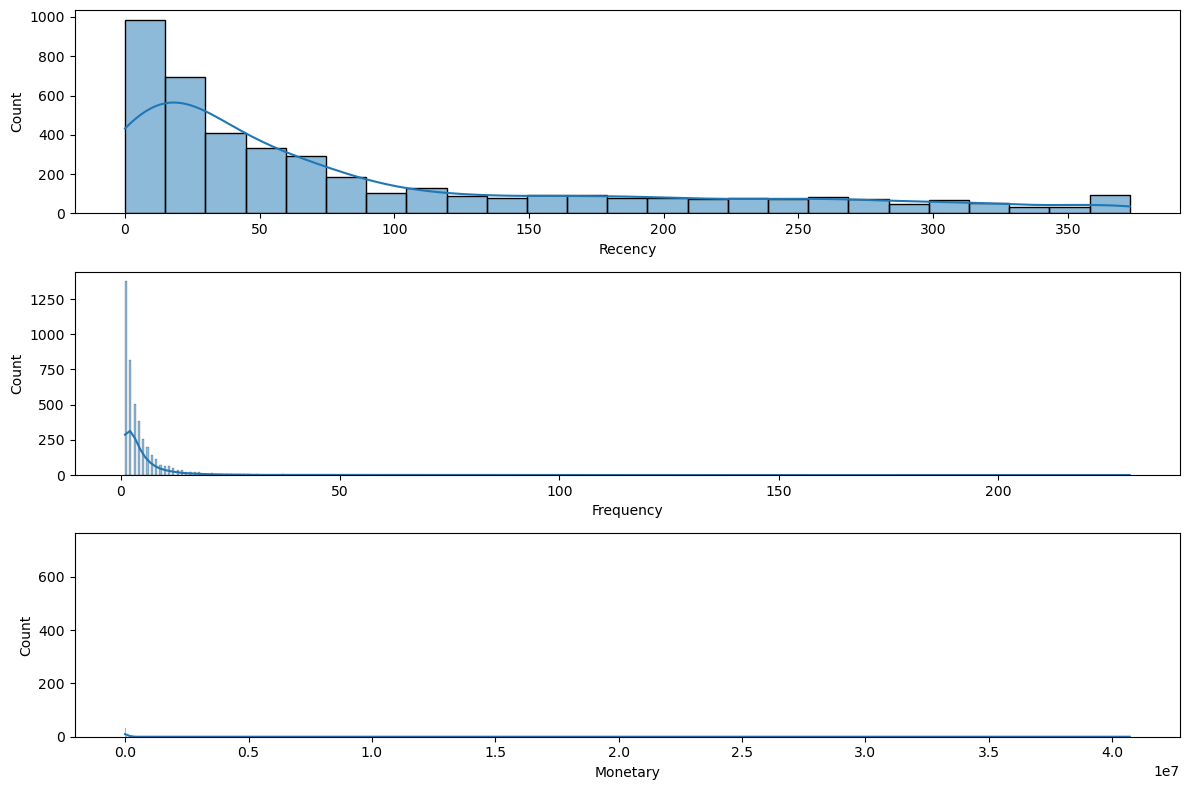

In [596]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.histplot(rfm['Recency'], kde=True)

plt.subplot(3,1,2)
sns.histplot(rfm['Frequency'], kde=True)

plt.subplot(3,1,3)
sns.histplot(rfm['Monetary'], kde=True)


plt.tight_layout()
plt.show()

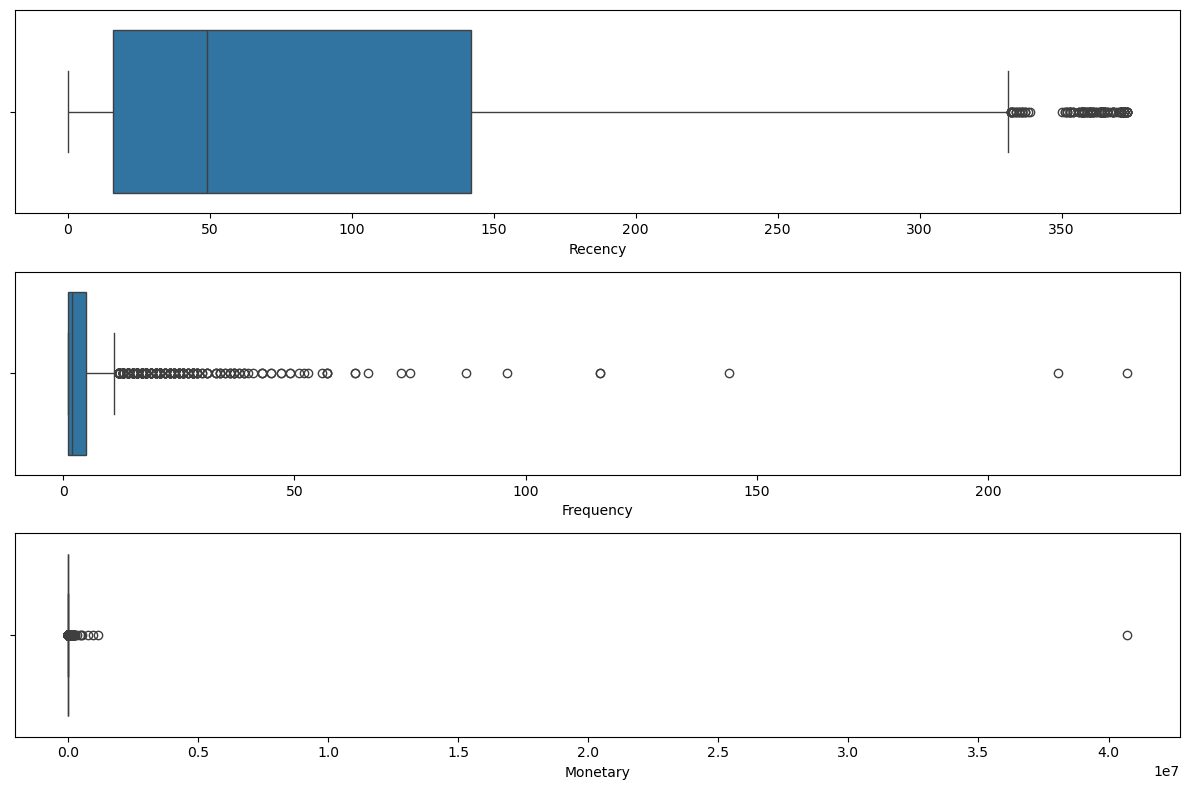

In [597]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.boxplot(x = rfm['Recency'])

plt.subplot(3,1,2)
sns.boxplot(x = rfm['Frequency'])

plt.subplot(3,1,3)
sns.boxplot(x = rfm['Monetary'])


plt.tight_layout()
plt.show()

### RFM Score

In [598]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4348.000000,4348.000000,4348.000000,4.348000e+03
mean,321298.430313,91.154094,4.743560,1.722555e+04
std,36163.177923,100.583052,8.580222,6.181935e+05
min,259266.000000,0.000000,1.000000,-4.938480e+03
25%,290109.750000,16.000000,1.000000,1.230622e+03
50%,321289.500000,49.000000,2.000000,2.682540e+03
75%,352343.250000,142.000000,5.000000,6.594855e+03
max,384027.000000,373.000000,230.000000,4.071085e+07


In [599]:
def rfm_score(baris):
        # recency
        if baris['Recency'] <= 20:
            r = 4
        elif baris['Recency'] <= 53 and baris['Recency'] > 20:
            r = 3
        elif baris['Recency'] <= 138 and baris['Recency'] > 53:
            r = 2
        else:
            r = 1

        # frequency
        if baris['Frequency'] <= 3:
            f = 1
        elif baris['Frequency'] <= 5 and baris['Frequency'] > 3:
            f = 2
        elif baris['Frequency'] <= 10 and baris['Frequency'] > 5:
            f = 3
        elif baris['Frequency'] <= 12 and baris['Frequency'] > 10:
            f = 4
        else:
            f = 5

        # monetary
        if baris['Monetary'] <= 300:
            m = 1
        elif baris['Monetary'] <= 700 and baris['Monetary'] > 300:
            m = 2
        elif baris['Monetary'] <= 1500 and baris['Monetary'] > 700:
            m = 3
        elif baris['Monetary'] <= 3000 and baris['Monetary'] > 1500:
            m = 4
        else:
            m = 5

        return r+f+m

rfm['RFM_Score ']= rfm.apply(rfm_score, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score
0,259266,325,2,0.00,3
1,259287,1,6,14928.18,12
2,259308,74,4,5991.12,9
3,259329,18,1,6043.92,10
4,259350,309,1,1221.60,5
...,...,...,...,...,...
4343,383880,277,1,748.65,5
4344,383901,180,1,334.80,4
4345,383922,7,3,733.05,8
4346,383943,3,16,8465.61,14


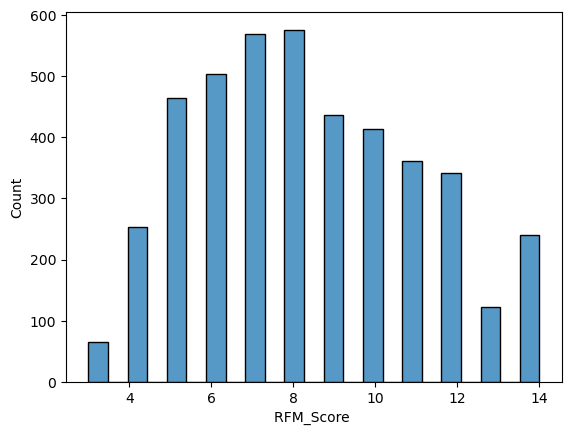

In [600]:
sns.histplot(rfm['RFM_Score '])
plt.show()

### RFM Segmentation

In [601]:
def rfm_score(baris):
    # recency
    if baris['Recency'] <= 20:
        r = 4
    elif baris['Recency'] <= 53 and baris['Recency'] > 20:
        r = 3
    elif baris['Recency'] <= 138 and baris['Recency'] > 53:
        r = 2
    else:
        r = 1

    # frequency
    if baris['Frequency'] <= 3:
        f = 1
    elif baris['Frequency'] <= 5 and baris['Frequency'] > 3:
        f = 2
    elif baris['Frequency'] <= 10 and baris['Frequency'] > 5:
        f = 3
    elif baris['Frequency'] <= 12 and baris['Frequency'] > 10:
        f = 4
    else:
        f = 5

    # monetary
    if baris['Monetary'] <= 300:
        m = 1
    elif baris['Monetary'] <= 700 and baris['Monetary'] > 300:
        m = 2
    elif baris['Monetary'] <= 1500 and baris['Monetary'] > 700:
        m = 3
    elif baris['Monetary'] <= 3000 and baris['Monetary'] > 1500:
        m = 4
    else:
        m = 5

    return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m}) # Mengembalikan Series bukan sum

rfm[['R_Score', 'F_Score', 'M_Score']] = rfm.apply(rfm_score, axis=1) # Menambahkan kolom R, F, dan M
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score'] # Menghitung RFM Score
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score,R_Score,F_Score,M_Score,RFM_Score
0,259266,325,2,0.00,3,1,1,1,3
1,259287,1,6,14928.18,12,4,3,5,12
2,259308,74,4,5991.12,9,2,2,5,9
3,259329,18,1,6043.92,10,4,1,5,10
4,259350,309,1,1221.60,5,1,1,3,5
...,...,...,...,...,...,...,...,...,...
4343,383880,277,1,748.65,5,1,1,3,5
4344,383901,180,1,334.80,4,1,1,2,4
4345,383922,7,3,733.05,8,4,1,3,8
4346,383943,3,16,8465.61,14,4,5,5,14


In [602]:
rfm['FM_Score'] = rfm['F_Score'] + rfm['M_Score']

# Manual Clustering using IF-ELSE Conditions
def segment_customer(row):
    recency = row['R_Score']
    fm_combined = row['FM_Score']
    if recency >= 4 and fm_combined >= 4:
        return 'Champions'
    elif recency >= 3 and fm_combined >= 3:
        return 'Loyal Customers'
    elif recency >= 2 and fm_combined >= 3:
        return 'Potential Loyalist'
    elif recency >= 3 and fm_combined <= 2:
        return 'Promising'
    elif recency < 2 and fm_combined >= 3:
        return 'At Risk'
    elif recency < 2 and fm_combined <= 2:
        return 'Lost'
    else:
        return 'Uncategorized'

# Apply the segmentation function
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score,R_Score,F_Score,M_Score,RFM_Score,FM_Score,Customer_Segment
0,259266,325,2,0.00,3,1,1,1,3,2,Lost
1,259287,1,6,14928.18,12,4,3,5,12,8,Champions
2,259308,74,4,5991.12,9,2,2,5,9,7,Potential Loyalist
3,259329,18,1,6043.92,10,4,1,5,10,6,Champions
4,259350,309,1,1221.60,5,1,1,3,5,4,At Risk
...,...,...,...,...,...,...,...,...,...,...,...
4343,383880,277,1,748.65,5,1,1,3,5,4,At Risk
4344,383901,180,1,334.80,4,1,1,2,4,3,At Risk
4345,383922,7,3,733.05,8,4,1,3,8,4,Champions
4346,383943,3,16,8465.61,14,4,5,5,14,10,Champions


In [603]:
rfm['Customer_Segment'].value_counts()

Customer_Segment
Champions             1233
Loyal Customers       1045
At Risk               1038
Potential Loyalist     923
Lost                    65
Promising               24
Uncategorized           20
Name: count, dtype: int64

In [604]:
rfm['Customer_Segment'].value_counts()/len(rfm)*100

Customer_Segment
Champions             28.357866
Loyal Customers       24.034039
At Risk               23.873045
Potential Loyalist    21.228151
Lost                   1.494940
Promising              0.551978
Uncategorized          0.459982
Name: count, dtype: float64

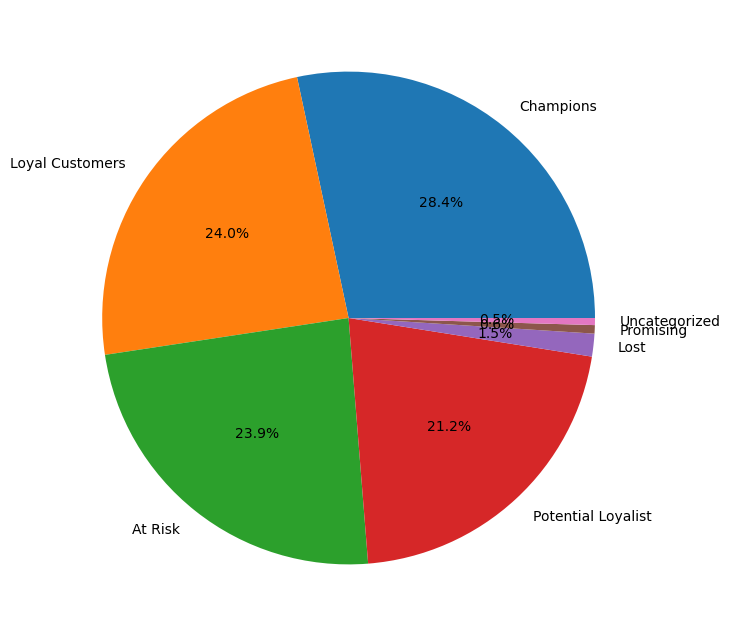

In [605]:
plt.figure(figsize=(8,8))
plt.pie(rfm['Customer_Segment'].value_counts(), labels=rfm['Customer_Segment'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [606]:
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score,R_Score,F_Score,M_Score,RFM_Score,FM_Score,Customer_Segment
0,259266,325,2,0.00,3,1,1,1,3,2,Lost
1,259287,1,6,14928.18,12,4,3,5,12,8,Champions
2,259308,74,4,5991.12,9,2,2,5,9,7,Potential Loyalist
3,259329,18,1,6043.92,10,4,1,5,10,6,Champions
4,259350,309,1,1221.60,5,1,1,3,5,4,At Risk
...,...,...,...,...,...,...,...,...,...,...,...
4343,383880,277,1,748.65,5,1,1,3,5,4,At Risk
4344,383901,180,1,334.80,4,1,1,2,4,3,At Risk
4345,383922,7,3,733.05,8,4,1,3,8,4,Champions
4346,383943,3,16,8465.61,14,4,5,5,14,10,Champions


In [607]:
import plotly as py
import plotly.graph_objs as go

# Buat pemetaan warna untuk setiap segmen customer
color_map = {
    'Champions': 'blue',
    'Loyal Customers': 'green',
    'Potential Loyalist': 'orange',
    'Promising': 'purple',
    'At Risk': 'red',
    'Lost': 'gray',
    'Uncategorized': 'black'
}

# Ubah warna marker menggunakan pemetaan
colors = [color_map[segment] for segment in rfm['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=rfm['R_Score'],
    y=rfm['F_Score'],
    z=rfm['M_Score'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Gunakan colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)

In [608]:
import plotly as py
import plotly.graph_objs as go

# Buat pemetaan warna untuk setiap segmen customer
color_map = {
    'Champions': 'blue',
    'Loyal Customers': 'green',
    'Potential Loyalist': 'orange',
    'Promising': 'purple',
    'At Risk': 'red',
    'Lost': 'gray',
    'Uncategorized': 'black'
}

# Ubah warna marker menggunakan pemetaan
colors = [color_map[segment] for segment in rfm['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=rfm['Recency'],
    y=rfm['Frequency'],
    z=rfm['Monetary'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Gunakan colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)

# Market Basket Analysis

## Filter Top 50

In [611]:
df['Description'].nunique()

3877

In [612]:
top50 = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(50)
top50

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      159213
JUMBO BAG RED RETROSPOT                133974
ASSORTED COLOUR BIRD ORNAMENT          104847
WHITE HANGING HEART T-LIGHT HOLDER     101493
PACK OF 72 RETROSPOT CAKE CASES         99723
POPCORN HOLDER                          91512
RABBIT NIGHT LIGHT                      81147
MINI PAINT SET VINTAGE                  77541
PACK OF 12 LONDON TISSUES               75879
PACK OF 60 PINK PAISLEY CAKE CASES      72390
BROCADE RING PURSE                      68781
VICTORIAN GLASS HANGING T-LIGHT         65490
ASSORTED COLOURS SILK FAN               63396
RED  HARMONICA IN BOX                   62472
JUMBO BAG PINK POLKADOT                 59067
SMALL POPCORN HOLDER                    54450
60 TEATIME FAIRY CAKE CASES             52467
LUNCH BAG RED RETROSPOT                 51108
JUMBO BAG STRAWBERRY                    49533
HEART OF WICKER SMALL                   48357
GROW A FLYTRAP OR SUNFLOWER IN TIN      47604
COLOUR GLASS T-LIGHT H

In [613]:
df = df[df['Description'].isin(top50.index)]
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Acquisition Date,Transaction Month,TotalPrice
10,316848,6262696,2018-12-15 10:05:00,460215,RED HARMONICA IN BOX,36,1.73,United Kingdom,2018-12,2018-12,62.28
21,364308,6257163,2018-12-11 07:39:00,434028,DISCO BALL CHRISTMAS DECORATION,72,0.17,United Kingdom,2018-04,2018-12,12.24
35,355383,6335252,2019-01-25 06:35:00,435204,RED RETROSPOT CHARLOTTE BAG,30,1.18,United Kingdom,2018-02,2019-01,35.40
42,271341,5995253,2018-05-09 10:25:00,445452,PACK OF 72 RETROSPOT CAKE CASES,72,0.76,United Kingdom,2018-02,2018-05,54.72
44,259854,6339795,2019-01-26 11:37:00,1784832,72 SWEETHEART FAIRY CAKE CASES,72,0.76,Austria,2019-01,2019-01,54.72
...,...,...,...,...,...,...,...,...,...,...,...
1069921,321216,6292308,2019-01-01 07:47:00,482349,HOMEMADE JAM SCENTED CANDLES,36,2.01,United Kingdom,2018-03,2019-01,72.36
1073691,378924,6314968,2019-01-15 04:56:00,482958,TRAVEL CARD WALLET KEEP CALM,72,0.58,United Kingdom,2018-02,2019-01,41.76
1074796,374661,5991436,2018-05-06 12:03:00,445473,PACK OF 72 SKULL CAKE CASES,9,0.76,United Kingdom,2018-02,2018-05,6.84
1075639,350826,6199380,2018-10-29 11:53:00,1787079,JUMBO BAG STRAWBERRY,9,2.88,United Kingdom,2018-10,2018-10,25.92


## Pivot Table

In [614]:
basket = df.pivot_table(
                index = 'CustomerID',
                columns = 'Description',
                aggfunc = 'size', # menghitung berapa kali customer ID membeli produk
                fill_value = 0
)

# mengubah nilai menjadi 1 dan 0 (1 jika pernah membeli dan 0 belum pernah membeli)
basket = basket.map(lambda x: 1 if x > 0 else 0)
basket

Description,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOURS SILK FAN,BLACK RECORD COVER FRAME,BROCADE RING PURSE,BUBBLEGUM RING ASSORTED,COLOUR GLASS T-LIGHT HOLDER HANGING,...,SET OF 60 PANTRY DESIGN CAKE CASES,SET/20 RED RETROSPOT PAPER NAPKINS,SMALL CHINESE STYLE SCISSOR,SMALL POPCORN HOLDER,SPACEBOY LUNCH BOX,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WORLD WAR 2 GLIDERS ASSTD DESIGNS
CustomerID,,,,,,,,,,,,,,,,,,,,,
259287,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259308,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383796,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383817,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [615]:
from mlxtend.frequent_patterns import apriori, association_rules

In [616]:
support_antecedent = apriori(basket,
        min_support=0.05, # minimal proprosi 5 persen
        use_colnames=True) # mendapatkan nama produk dari kolom
support_antecedent

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.094355,(60 CAKE CASES VINTAGE CHRISTMAS)
1,0.114555,(60 TEATIME FAIRY CAKE CASES)
2,0.089928,(72 SWEETHEART FAIRY CAKE CASES)
3,0.096292,(ANTIQUE SILVER T-LIGHT GLASS)
4,0.187604,(ASSORTED COLOUR BIRD ORNAMENT)
...,...,...
78,0.050913,"(PACK OF 72 RETROSPOT CAKE CASES, WHITE HANGIN..."
79,0.052573,"(REGENCY CAKESTAND 3 TIER, PAPER CHAIN KIT 50'..."
80,0.076646,"(REGENCY CAKESTAND 3 TIER, PARTY BUNTING)"
81,0.070559,"(PARTY BUNTING, WHITE HANGING HEART T-LIGHT HO..."


In [618]:
ass_rules = association_rules(support_antecedent, metric='confidence', min_threshold=0.1, num_itemsets=2)
ass_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.114555,0.089928,0.050913,0.444444,4.942222,1.0,0.040611,1.638129,0.900859,0.331532,0.389548,0.505299
1,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.089928,0.114555,0.050913,0.566154,4.942222,1.0,0.040611,2.040920,0.876482,0.331532,0.510025,0.505299
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.114555,0.113724,0.056447,0.492754,4.332875,1.0,0.043420,1.747229,0.868722,0.328502,0.427665,0.494552
3,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.113724,0.114555,0.056447,0.496350,4.332875,1.0,0.043420,1.758058,0.867909,0.328502,0.431191,0.494552
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.114555,0.175429,0.074433,0.649758,3.703828,1.0,0.054337,2.354293,0.824454,0.345315,0.575244,0.537024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,(PARTY BUNTING),(REGENCY CAKESTAND 3 TIER),0.195905,0.244051,0.076646,0.391243,1.603120,1.0,0.028836,1.241791,0.467876,0.210967,0.194712,0.352651
76,(PARTY BUNTING),(WHITE HANGING HEART T-LIGHT HOLDER),0.195905,0.236303,0.070559,0.360169,1.524183,1.0,0.024266,1.193592,0.427699,0.195103,0.162193,0.329382
77,(WHITE HANGING HEART T-LIGHT HOLDER),(PARTY BUNTING),0.236303,0.195905,0.070559,0.298595,1.524183,1.0,0.024266,1.146406,0.450324,0.195103,0.127709,0.329382
78,(REGENCY CAKESTAND 3 TIER),(WHITE HANGING HEART T-LIGHT HOLDER),0.244051,0.236303,0.071942,0.294785,1.247484,1.0,0.014272,1.082927,0.262434,0.176152,0.076577,0.299617


In [619]:
ass_rules.sort_values('lift', ascending=False).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
33,(JUMBO BAG STRAWBERRY),(JUMBO BAG PINK POLKADOT),0.087438,0.102656,0.050083,0.572785,5.579634,1.0,0.041107,2.100449,0.89942,0.357708,0.523911,0.530328


In [620]:
ass_rules.sort_values('confidence', ascending=False).head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
36,(JUMBO BAG STRAWBERRY),(JUMBO BAG RED RETROSPOT),0.087438,0.175429,0.068345,0.781646,4.455626,1.0,0.053006,3.776297,0.849876,0.351351,0.735190,0.585618
30,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.102656,0.175429,0.078583,0.765499,4.363584,1.0,0.060574,3.516275,0.859014,0.393897,0.715608,0.606724
20,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.084671,0.175429,0.061981,0.732026,4.172780,1.0,0.047127,3.077058,0.830686,0.312849,0.675014,0.542669
26,(JUMBO BAG APPLES),(JUMBO BAG RED RETROSPOT),0.095185,0.175429,0.069175,0.726744,4.142671,1.0,0.052477,3.017579,0.838415,0.343407,0.668609,0.560533
57,(PACK OF 60 DINOSAUR CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.079967,0.175429,0.054510,0.681661,3.885682,1.0,0.040482,2.590229,0.807194,0.271350,0.613934,0.496193
58,(PACK OF 60 PINK PAISLEY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.113724,0.175429,0.075816,0.666667,3.800210,1.0,0.055866,2.473713,0.831408,0.355383,0.595749,0.549422
61,(PACK OF 72 SKULL CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.081627,0.175429,0.054234,0.664407,3.787328,1.0,0.039914,2.457055,0.801376,0.267394,0.593009,0.486778
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.114555,0.175429,0.074433,0.649758,3.703828,1.0,0.054337,2.354293,0.824454,0.345315,0.575244,0.537024
7,(72 SWEETHEART FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.089928,0.175429,0.057554,0.640000,3.648202,1.0,0.041778,2.290475,0.797621,0.276964,0.563409,0.484038
50,(LUNCH BAG APPLE DESIGN),(LUNCH BAG RED RETROSPOT),0.110957,0.147205,0.069729,0.628429,4.269064,1.0,0.053395,2.295105,0.861327,0.370044,0.564290,0.551057
